# Churn Prediction in Telecoms

In [352]:
import pandas as pd
data = pd.read_csv('Churn in Telecoms dataset.csv')
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [353]:
data.info()
data.describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

<bound method NDFrame.describe of      state  account length  area code phone number international plan  \
0       KS             128        415     382-4657                 no   
1       OH             107        415     371-7191                 no   
2       NJ             137        415     358-1921                 no   
3       OH              84        408     375-9999                yes   
4       OK              75        415     330-6626                yes   
...    ...             ...        ...          ...                ...   
3328    AZ             192        415     414-4276                 no   
3329    WV              68        415     370-3271                 no   
3330    RI              28        510     328-8230                 no   
3331    CT             184        510     364-6381                yes   
3332    TN              74        415     400-4344                 no   

     voice mail plan  number vmail messages  total day minutes  \
0                yes   

In [354]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


# Separate the target variable (y) and features (X)
target_variable = 'churn'
X = data.drop(columns=[target_variable])
y = data[target_variable]

# Encode categorical variables if needed (e.g., 'international plan' and 'voice mail plan')
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Get feature importances from the trained Random Forest model
feature_importances = pd.Series(rf_classifier.feature_importances_, index=X.columns)

# Sort feature importances in descending order
sorted_feature_importances = feature_importances.sort_values(ascending=False)

# Select the most important columns for data modeling (e.g., top 6)
most_important_columns = sorted_feature_importances[:6].index.tolist()
most_important_columns

['total day minutes',
 'total day charge',
 'customer service calls',
 'international plan_yes',
 'total eve charge',
 'total eve minutes']

In [355]:
# Create a list of relevant numeric columns (excluding the 'churn' column)
relevant_columns = ['total day minutes', 'total day charge', 'customer service calls',
                            'total eve charge', 'total eve minutes', 'international plan']

# Select only the relevant numeric columns and the target variable 'churn'
data2 = data[relevant_columns + ['churn']]

#display first five columns
data2.head()

,total day minutes,total day charge,customer service calls,total eve charge,total eve minutes,international plan,churn
0,265.1,45.07,1,16.78,197.4,no,False
1,161.6,27.47,1,16.62,195.5,no,False
2,243.4,41.38,0,10.30,121.2,no,False
3,299.4,50.90,2,5.26,61.9,yes,False
4,166.7,28.34,3,12.61,148.3,yes,False


In [356]:
data['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [357]:
#inspect the data variables
data2.describe()

,total day minutes,total day charge,customer service calls,total eve charge,total eve minutes
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,179.775098,30.562307,1.562856,17.083540,200.980348
std,54.467389,9.259435,1.315491,4.310668,50.713844
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,143.700000,24.430000,1.000000,14.160000,166.600000
50%,179.400000,30.500000,1.000000,17.120000,201.400000
75%,216.400000,36.790000,2.000000,20.000000,235.300000
max,350.800000,59.640000,9.000000,30.910000,363.700000


## Data Cleaning

In [358]:
# Convert 'international plan' to boolean type
data2['international plan'] = data2['international plan'].map({'yes': True, 'no': False})
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   total day minutes       3333 non-null   float64
 1   total day charge        3333 non-null   float64
 2   customer service calls  3333 non-null   int64  
 3   total eve charge        3333 non-null   float64
 4   total eve minutes       3333 non-null   float64
 5   international plan      3333 non-null   bool   
 6   churn                   3333 non-null   bool   
dtypes: bool(2), float64(4), int64(1)
memory usage: 136.8 KB


C:\Users\user\AppData\Local\Temp\ipykernel_6464\108688473.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['international plan'] = data2['international plan'].map({'yes': True, 'no': False})


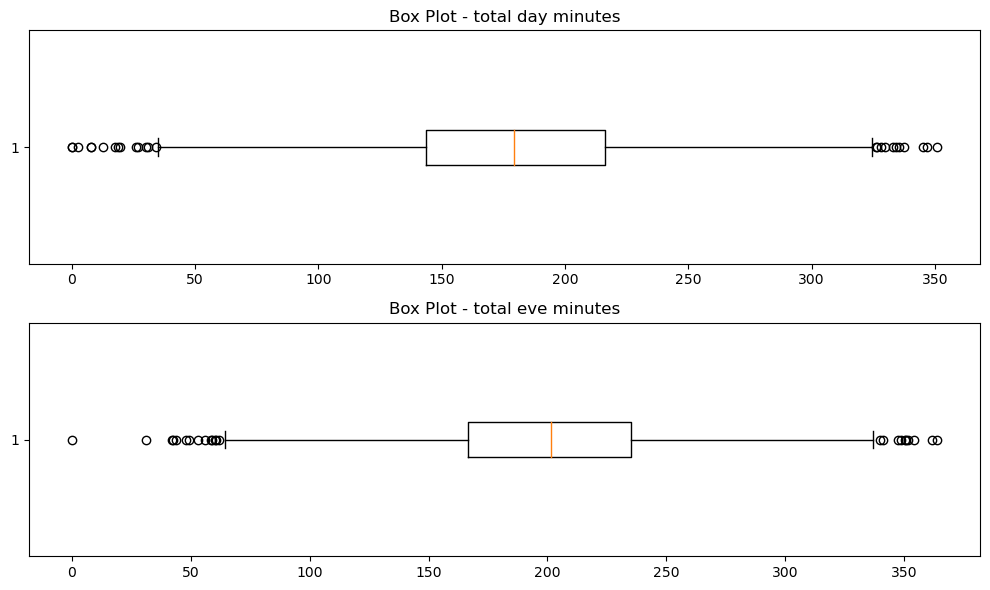

In [359]:
# Check for outliers in "Year" and "Fatalities" columns using box plots
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.boxplot(data2['total day minutes'], vert=False)
plt.title("Box Plot - total day minutes")
plt.subplot(2, 1, 2)
plt.boxplot(data2['total eve minutes'], vert=False)
plt.title("Box Plot - total eve minutes")
plt.tight_layout()
plt.show()

In [360]:
#eliminate extreme values

# Calculate the IQR for 'total day minutes' and 'total eve minutes'
Q1_day = data2['total day minutes'].quantile(0.25)
Q3_day = data2['total day minutes'].quantile(0.75)
IQR_day = Q3_day - Q1_day

Q1_eve = data2['total eve minutes'].quantile(0.25)
Q3_eve = data2['total eve minutes'].quantile(0.75)
IQR_eve = Q3_eve - Q1_eve

# Define the upper and lower bounds for outlier detection
lower_bound_day = Q1_day - 1.5 * IQR_day
upper_bound_day = Q3_day + 1.5 * IQR_day

lower_bound_eve = Q1_eve - 1.5 * IQR_eve
upper_bound_eve = Q3_eve + 1.5 * IQR_eve

# Eliminate extreme values for 'total day minutes' and 'total eve minutes'
data2 = data2.loc[(data2['total day minutes'] >= lower_bound_day) & (data2['total day minutes'] <= upper_bound_day)]
data2 = data2.loc[(data2['total eve minutes'] >= lower_bound_eve) & (data2['total eve minutes'] <= upper_bound_eve)]

In [361]:
data2.describe()

,total day minutes,total day charge,customer service calls,total eve charge,total eve minutes
count,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000
mean,179.881303,30.580362,1.568210,17.100585,201.180816
std,52.863533,8.986756,1.316467,4.184184,49.225707
min,35.100000,5.970000,0.000000,5.470000,64.300000
25%,143.975000,24.475000,1.000000,14.200000,167.100000
50%,179.400000,30.500000,1.000000,17.120000,201.400000
75%,216.125000,36.742500,2.000000,19.982500,235.125000
max,324.700000,55.200000,9.000000,28.650000,337.100000


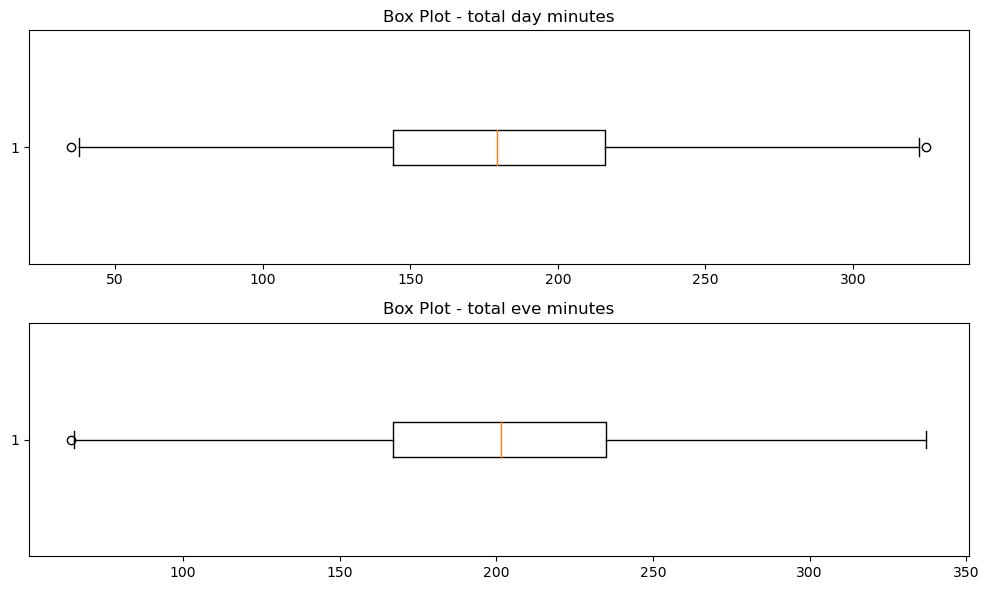

In [362]:
#recheck for outliers
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.boxplot(data2['total day minutes'], vert=False)
plt.title("Box Plot - total day minutes")
plt.subplot(2, 1, 2)
plt.boxplot(data2['total eve minutes'], vert=False)
plt.title("Box Plot - total eve minutes")
plt.tight_layout()
plt.show()

## Feature Engineering

Perform one Hot Encoding on 'churn' and 'international plan' columns to convert into numeric binary columns

In [363]:
# Apply One-Hot Encoding to 'international plan' and 'churn' columns
data2_encoded = pd.get_dummies(data2, columns=['international plan', 'churn'], drop_first=True)

# Convert 'international plan_True' and 'churn_True' to 0 and 1, respectively
data2_encoded['international plan_True'] = data2_encoded['international plan_True'].astype(int)
data2_encoded['churn_True'] = data2_encoded['churn_True'].astype(int)
data2_encoded.head()

,total day minutes,total day charge,customer service calls,total eve charge,total eve minutes,international plan_True,churn_True
0,265.1,45.07,1,16.78,197.4,0,0
1,161.6,27.47,1,16.62,195.5,0,0
2,243.4,41.38,0,10.30,121.2,0,0
4,166.7,28.34,3,12.61,148.3,1,0
5,223.4,37.98,0,18.75,220.6,1,0


## Exploratory Data Analysis
Analyze the data to gain insights about the patterns of churn.

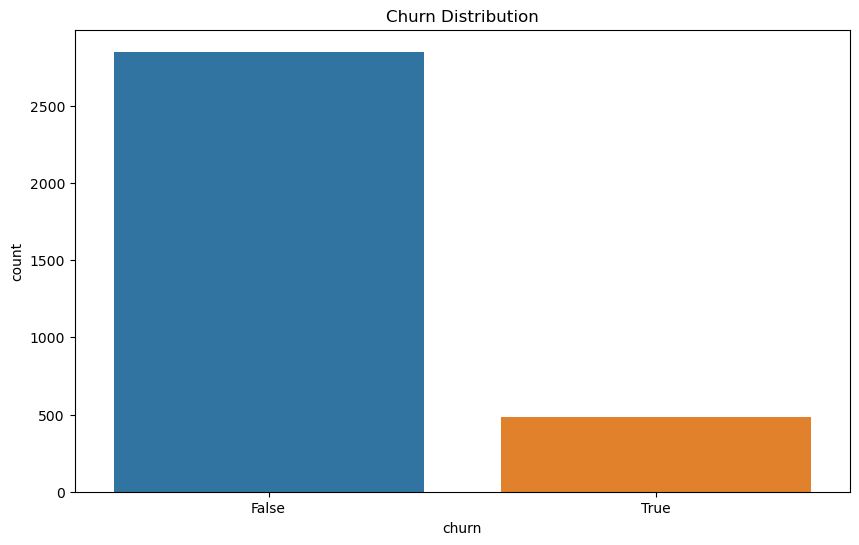

In [364]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Bivariate analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='churn', data=data)
plt.title('Churn Distribution')
plt.show()




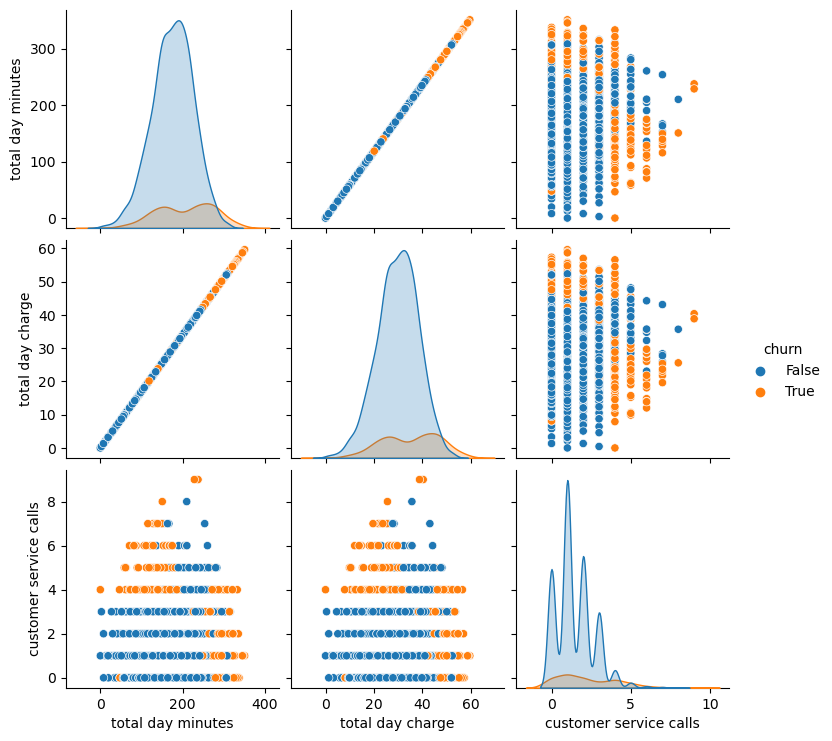

In [365]:
selected_features = ['churn', 'total day minutes', 'total day charge', 'customer service calls']
subset_data = data[selected_features]
sns.pairplot(subset_data, hue='churn', diag_kind='kde')
plt.show()

In [366]:
# Multivariate analysis
#plt.figure(figsize=(10, 6))
#sns.boxplot(x='churn', y='Tenure', data=data)
#plt.title('Tenure vs Churn')
#plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_6464\3623675412.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


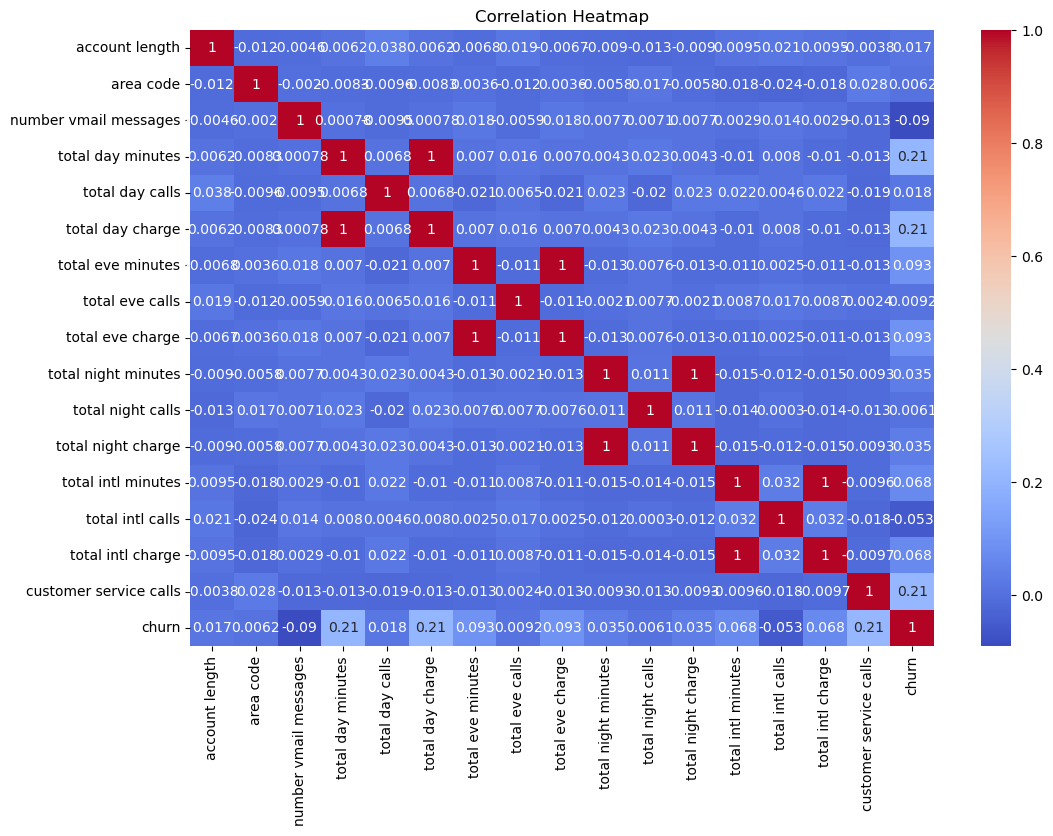

In [367]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Feature Selection
Select relevant features based on their correlation with the target variable and potential predictive power.

In [368]:
# Feature selection
correlation_matrix = data.corr()
selected_features = correlation_matrix[abs(correlation_matrix['churn']) > 0.1].index.tolist()

# Drop non-selected features
data = data[selected_features]
correlation_matrix

C:\Users\user\AppData\Local\Temp\ipykernel_6464\435827679.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
account length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
area code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
number vmail messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
total day minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
total day calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
total day charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
total eve minutes,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
total eve calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
total eve charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786
total night minutes,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493


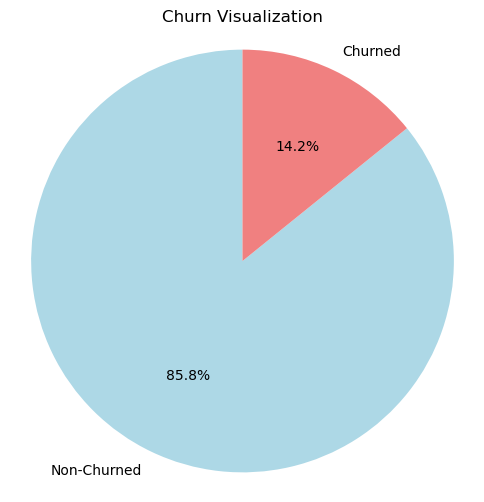

In [369]:
# Count the number of churned and non-churned customers
churn_counts = data2_encoded['churn_True'].value_counts()

# Create a pie chart to visualize the churn
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=['Non-Churned', 'Churned'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Churn Visualization')
plt.axis('equal')
plt.show()

The data visualization shows the churn rate in the dataset. Most of the customers lie under the non-churned section at 85.8%, while only 14.2% of customers had churned.This class imbalance can lead to biased prediction and inadequate representation of the churn class in the modeling process. This issue can be addressed usine SMOTE (Synthetic Minority Over-Sampling Technique).

## Class Balancing
Check if the classes are imbalanced and perform class balancing if necessary.

In [370]:
from imblearn.over_sampling import  SMOTE
X = data.drop('churn', axis=1)
y = data['churn']

# Apply SMOTE to generate synthetic samples (class balancing)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert the resampled data back to a DataFrame
data_resampled = pd.DataFrame(X_resampled, columns=X.columns)
data_resampled['churn_True'] = y_resampled
y_resampled.value_counts()

print(X_resampled.shape)
print(y_resampled.shape)

(5700, 4)
(5700,)


## Data Modeling
Split the data into training and testing sets, normalize features, and train a classification model.

## 1. Baseline model

In [371]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
model


LogisticRegression()

In [372]:
# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Baseline Model:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Baseline Model:
[[563   3]
 [ 97   4]]
              precision    recall  f1-score   support

       False       0.85      0.99      0.92       566
        True       0.57      0.04      0.07       101

    accuracy                           0.85       667
   macro avg       0.71      0.52      0.50       667
weighted avg       0.81      0.85      0.79       667



# Interpreting baseline results
Overally, the model has a high accuracy, precision, recall and f1-scores

## Model 2- Random Forest Model
We will build a decision tree

In [396]:
import numpy as np

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree

In [397]:
from sklearn.ensemble import RandomForestClassifier

In [398]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
rf_model


RandomForestClassifier()

In [399]:
# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Random Forest Model")
print(classification_report(y_test, y_pred_rf))

Random Forest Model
              precision    recall  f1-score   support

       False       0.89      0.93      0.91       566
        True       0.47      0.37      0.41       101

    accuracy                           0.84       667
   macro avg       0.68      0.65      0.66       667
weighted avg       0.83      0.84      0.83       667



## Model 3- Decision Tree

In [400]:
from sklearn.tree import DecisionTreeClassifier
# Train the decision tree
#create the classifier,
decision_tree = DecisionTreeClassifier(criterion='entropy')
decision_tree.fit(X_train_scaled, y_train)
y_pred_decision_tree = decision_tree.predict(X_test_scaled)
decision_tree

DecisionTreeClassifier(criterion='entropy')

In [404]:
# Create training and test set
target_variable = 'churn'

ohe = OneHotEncoder()
ohe.fit(X_train)
y = data[target_variable]

X = data = columns=(["total day minutes"])
#y = data['churn']


TypeError: list indices must be integers or slices, not str

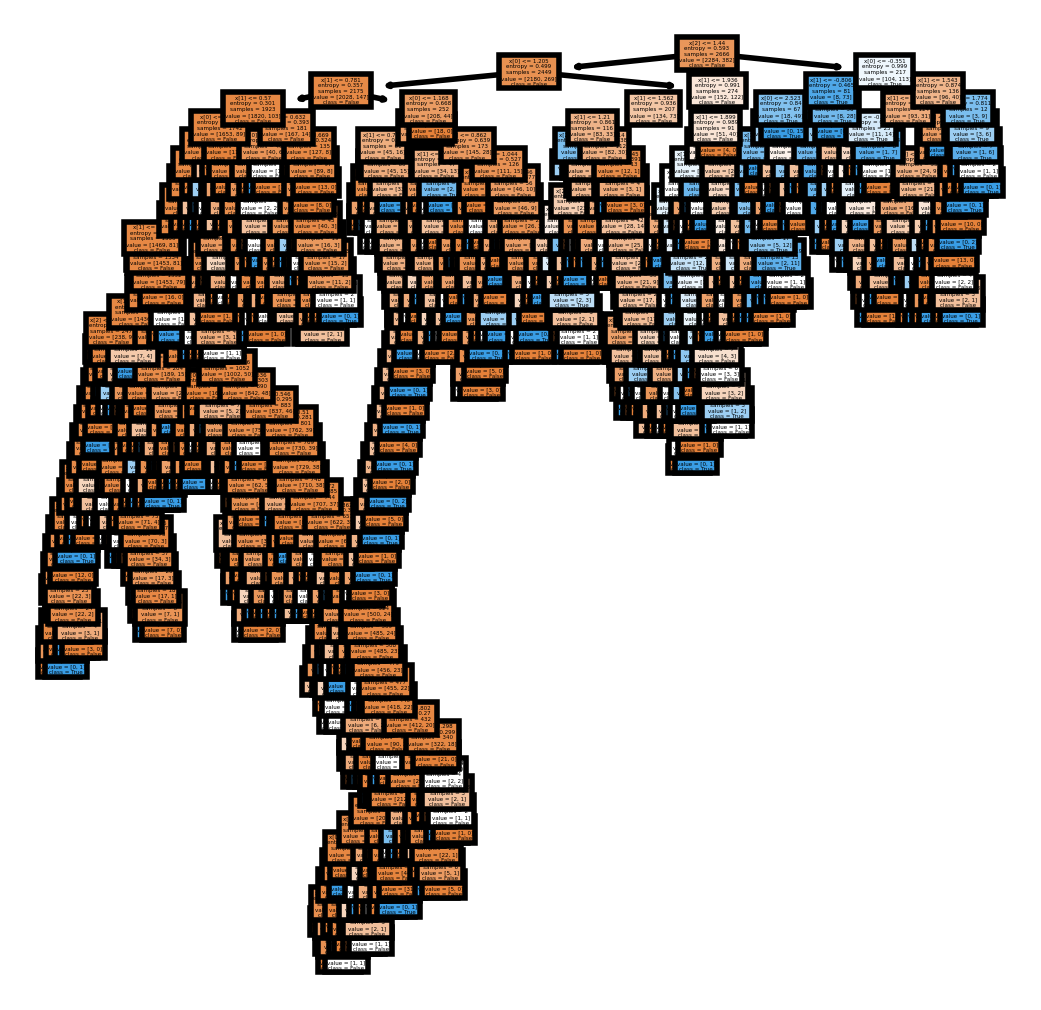

In [405]:
# Encode categorical data as numbers

X_train_ohe = ohe.transform(X_train).toarray()
# Plot the decision tree
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(3,3), dpi = 400)
tree.plot_tree(clf,
               #feature_names = ohe,
               class_names = np.unique(y).astype('str'),
               filled = True)
plt.show()

In [270]:
print("Decision Tree Model:")
print(classification_report(y_test, y_pred_decision_tree))

Decision Tree Model:
              precision    recall  f1-score   support

       False       0.89      0.90      0.89       566
        True       0.40      0.36      0.37       101

    accuracy                           0.82       667
   macro avg       0.64      0.63      0.63       667
weighted avg       0.81      0.82      0.82       667



## Random Forest Model with tuned hyperparameters

In [254]:
# Random Forest model with tuned hyperparameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
tuned_rf_model = RandomForestClassifier()
tuned_rf_model.fit(X_train_scaled, y_train)
y_pred_tuned_rf = tuned_rf_model.predict(X_test_scaled)

In [258]:
print("Tuned Random Forest Model:")
print(classification_report(y_test, y_pred_tuned_rf))

Tuned Random Forest Model:
              precision    recall  f1-score   support

       False       0.90      0.92      0.91       566
        True       0.48      0.40      0.43       101

    accuracy                           0.84       667
   macro avg       0.69      0.66      0.67       667
weighted avg       0.83      0.84      0.84       667



In [272]:
# Create training and test set
#target_variable = 'churn'

#ohe = OneHotEncoder()
#ohe.fit(X_train)
#y = data[target_variable]

#X = data = columns=(["account_length"])
#y = data['churn']


In [273]:
# Encode categorical data as numbers

#X_train_ohe = ohe.transform(X_train).toarray()
# Plot the decision tree
#figc, axes = plt.subplots(nrows=1, ncols=1, figsize=(3,3), dpi = 400)
#tree.plot_tree(clf,
               #feature_names = ohe_data.columns,
               #class_names = np.unique(y).astype('str'),
               #filled = True)
#plt.show()

In [239]:
# Evaluate the predictive performance
#X_test_ohe = ohe.transform(X_test)
#y_preds = clf.predict(X_test_ohe)
#print('Accuracy:', accuracy_score(y_test, y_preds))

## Hyperparameter Tuning
Fine-tune the hyperparameters of the model to improve its performance.

In [275]:
from sklearn.model_selection import GridSearchCV

# Hyperparamer tuning
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(best_params)
print(best_score)

{'C': 0.01}
0.8563392850868873


## Ensemble Methods
We'll use Random Forest to improve model performance.

In [103]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)

# Make predictions
rf_y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
print(confusion_matrix(y_test, rf_y_pred))
print(classification_report(y_test, rf_y_pred))

[[523  43]
 [ 64  37]]
              precision    recall  f1-score   support

       False       0.89      0.92      0.91       566
        True       0.46      0.37      0.41       101

    accuracy                           0.84       667
   macro avg       0.68      0.65      0.66       667
weighted avg       0.83      0.84      0.83       667



## Conclusion